In [1]:
import matplotlib

matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

In [2]:
#import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

# Plotting

In [3]:
data_reduced_genus = pd.read_csv("./results/reduced_data--genus_only.csv")

In [4]:
from abundance_utils import filter_by_abundance

filter_by_abundance(data=data_reduced_genus, 
                    column='abundance', high=1, low=0.5).head()

['Methylobacter' 'Methylophilus' 'Methylosarcina' 'other']


,ID,rep,week,oxy,Genus,Length,abundance,project
0,106_HOW12,4,12,High,Methylobacter,4325001,0.701923,1056226
1,76_LOW10,4,10,Low,Methylobacter,6062067,0.701577,1056166
2,94_HOW11,4,11,High,Methylobacter,5268714,0.698849,1056202
3,82_HOW10,4,10,High,Methylobacter,5488758,0.693746,1056178
4,40_LOW7,4,7,Low,Methylobacter,6012817,0.668513,1056094


## Demo `plot_heatmap()`

keep only High oxygen samples
['Methylobacter' 'Methylophilus' 'Methylosarcina' 'other']
filename: High_oxygen--0.5_to_0.6_abundance


/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


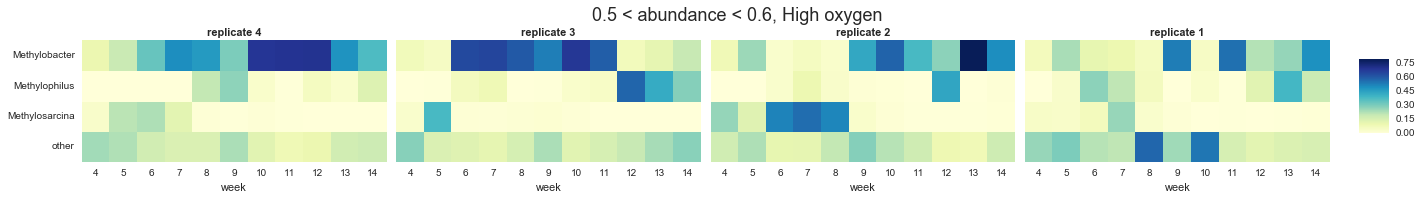

In [5]:
from abundance_plot_utils import plot_heatmap

# demo:
plot_heatmap(data=data_reduced_genus, high=0.6, low = 0.5, 
             oxy='High', rep='all', 
             plot_dir="./plots/facet_replicate")

## Run `plot_heatmap()` across braod conditions

keep only Low oxygen samples
['Methylobacter' 'other' 'Methylotenera' 'Flavobacterium' 'Methylosarcina']
filename: Low_oxygen--0.01_to_1_abundance
keep only Low oxygen samples
['Methylobacter' 'other' 'Methylotenera' 'Flavobacterium' 'Acidovorax']
filename: Low_oxygen--0.05_to_1_abundance
keep only Low oxygen samples
['Methylobacter' 'other' 'Methylotenera' 'Flavobacterium']
filename: Low_oxygen--0.1_to_1_abundance
keep only Low oxygen samples
['Methylobacter']
filename: Low_oxygen--0.5_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Methylotenera' 'Methylophilus' 'other' 'Methylosarcina']
filename: High_oxygen--0.01_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Methylotenera' 'Methylophilus' 'other' 'Methylosarcina']
filename: High_oxygen--0.05_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Methylotenera' 'Methylophilus' 'other' 'Methylosarcina']
filename: High_oxygen--0.1_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Me

/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


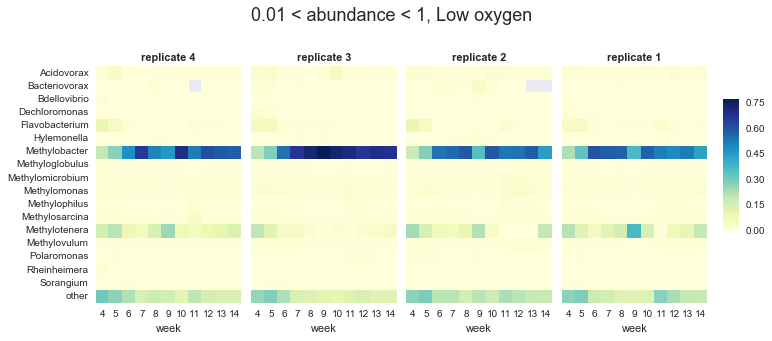

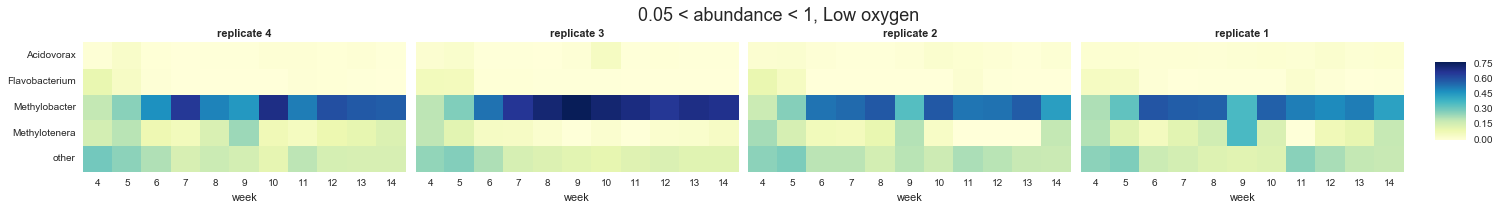

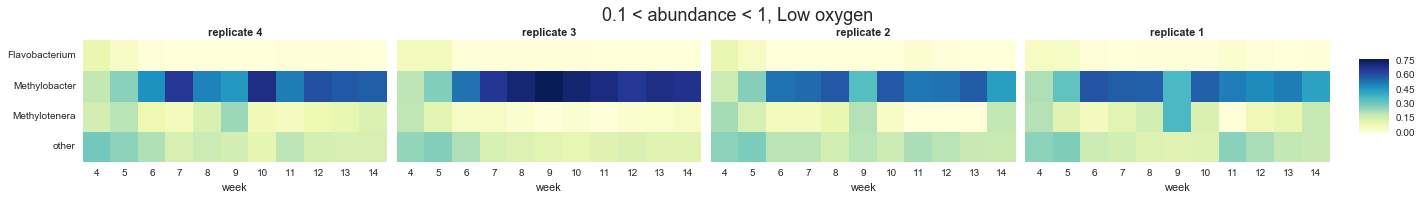

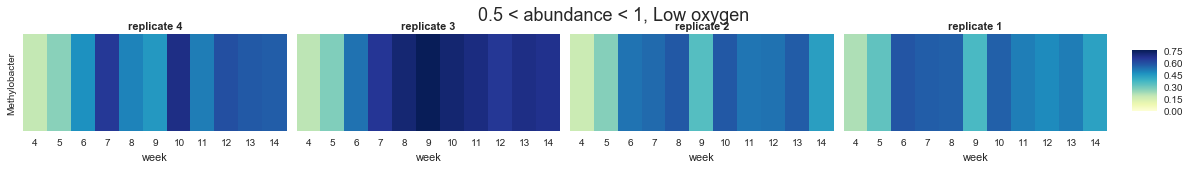

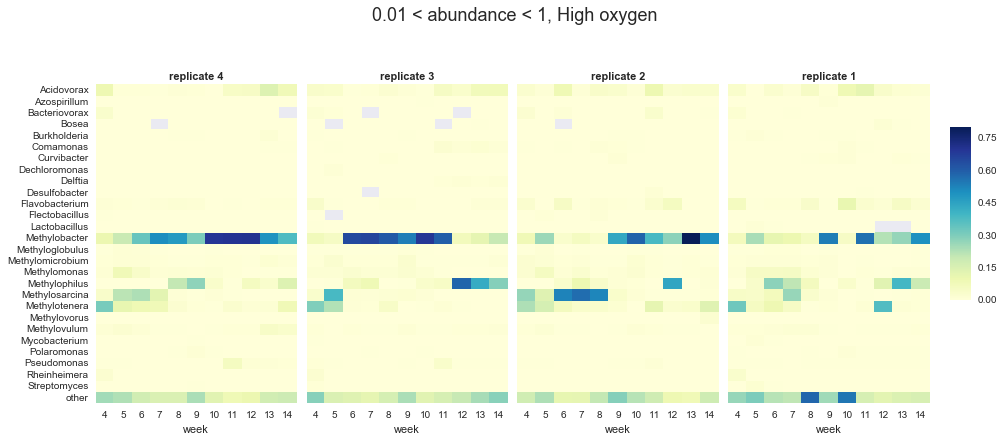

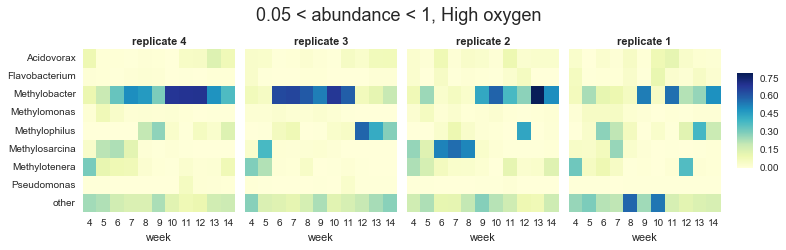

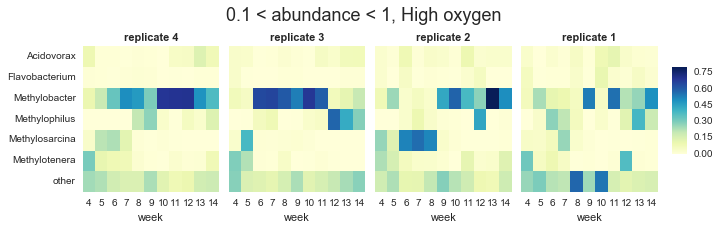

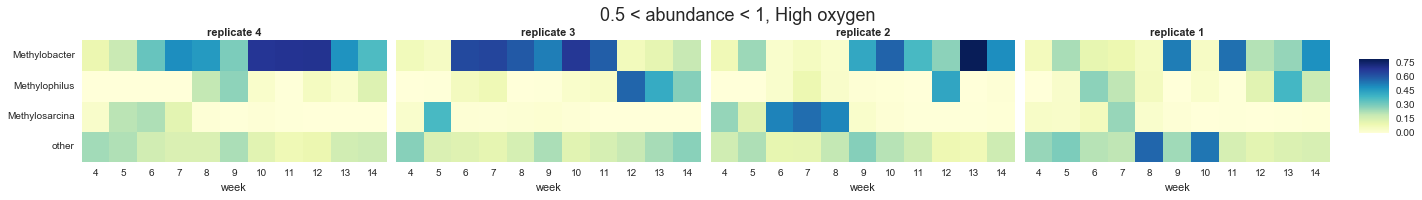

In [6]:
# Loop through the ranges we want. 
oxy_conditions = ['Low', 'High']
max_abundance = 1
range_pairs = [(0.01, max_abundance), 
               (0.05, max_abundance), 
               (0.1, max_abundance), 
               (0.5, max_abundance)]
for o in oxy_conditions:
    for r in range_pairs:
        #print "oxygen:", o
        #print "range:", r
        #print "range (low):", r[0]
        plot_heatmap(data=data_reduced_genus, 
                     low =r[0], high=r[1], oxy=o, rep='all',
                    plot_dir ='./plots/facet_replicate')

In [7]:
#data_reduced_genus[data_reduced_genus['ID']=='79_HOW10'].head()

In [8]:
#data_reduced_genus[data_reduced_genus['Genus']=='other'].head()

In [9]:
#data_reduced_genus.columns